In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
import os

for dirname, _, filenames in os.walk('.\input'):

    for filename in filenames:

        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Supermart Grocery Sales - Retail Analytics Dataset (1).csv')


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Supermart Grocery Sales - Retail Analytics Dataset (1).csv')

df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [6]:
num_rows, num_cols = df.shape

print("Shape of the Data:")

print(f"Number of Rows: {num_rows}")

print(f"Number of Columns: {num_cols}\n")

Shape of the Data:
Number of Rows: 9994
Number of Columns: 11



In [7]:
print(df.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [10]:
def convert_date(date_str):
    for fmt in ('%d-%m-%Y', '%m/%d/%Y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

df['Order Date'] = df['Order Date'].apply(convert_date)

print(df['Order Date'].isnull().sum(), "dates could not be parsed.")

0 dates could not be parsed.


In [11]:
df['Order Day'] = df['Order Date'].dt.day

df['Order Month'] = df['Order Date'].dt.month

df['Order Year'] = df['Order Date'].dt.year

In [12]:
df.duplicated().any()

np.False_

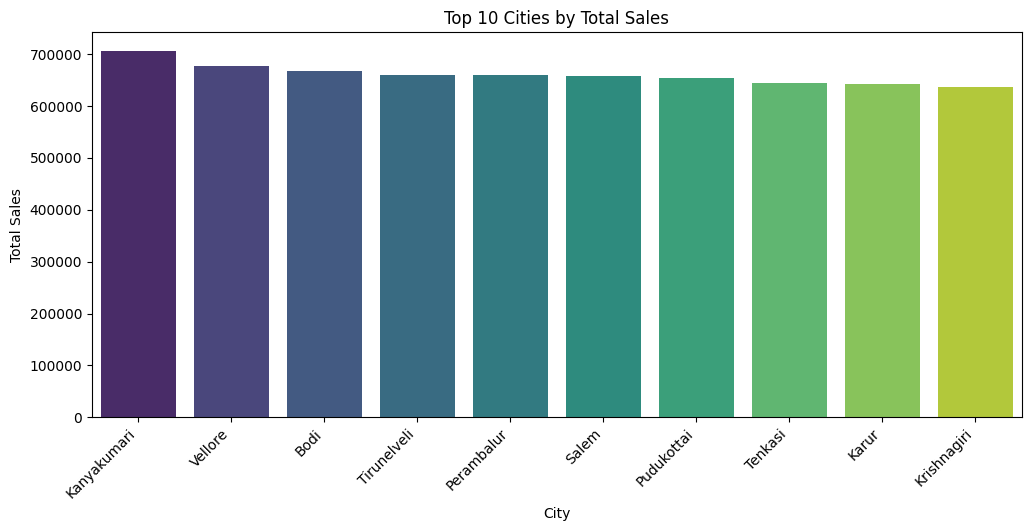

In [13]:
city_sales = df.groupby('City')['Sales'].sum().reset_index()

city_sales.sort_values(by='Sales', ascending=False, inplace=True)


plt.figure(figsize=(12, 5))

sns.barplot(x='City', y='Sales', data=city_sales.head(10), palette='viridis')

plt.title('Top 10 Cities by Total Sales')

plt.xlabel('City')

plt.ylabel('Total Sales')

plt.xticks(rotation=45, ha='right')

plt.show()

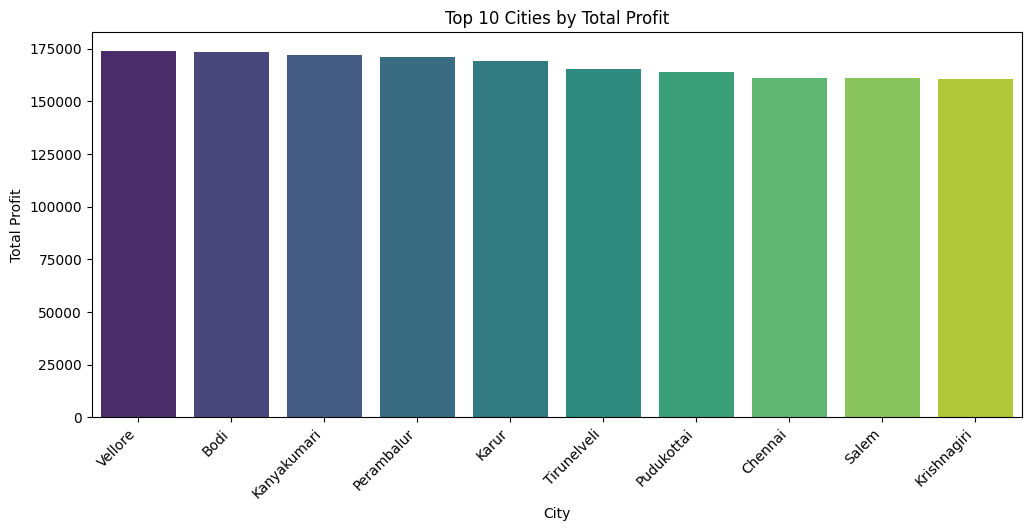

In [14]:
city_sales = df.groupby('City')['Profit'].sum().reset_index()

city_sales.sort_values(by='Profit', ascending=False, inplace=True)



plt.figure(figsize=(12, 5))

sns.barplot(x='City', y='Profit', data=city_sales.head(10), palette='viridis')

plt.title('Top 10 Cities by Total Profit')

plt.xlabel('City')

plt.ylabel('Total Profit')

plt.xticks(rotation=45, ha='right')

plt.show()

In [15]:
city_sales

,City,Profit
21,Vellore,174073.01
0,Bodi,173655.13
6,Kanyakumari,172217.74
13,Perambalur,171132.19
7,Karur,169305.94
19,Tirunelveli,165169.01
14,Pudukottai,164072.63
1,Chennai,160921.33
16,Salem,160899.30
8,Krishnagiri,160477.48


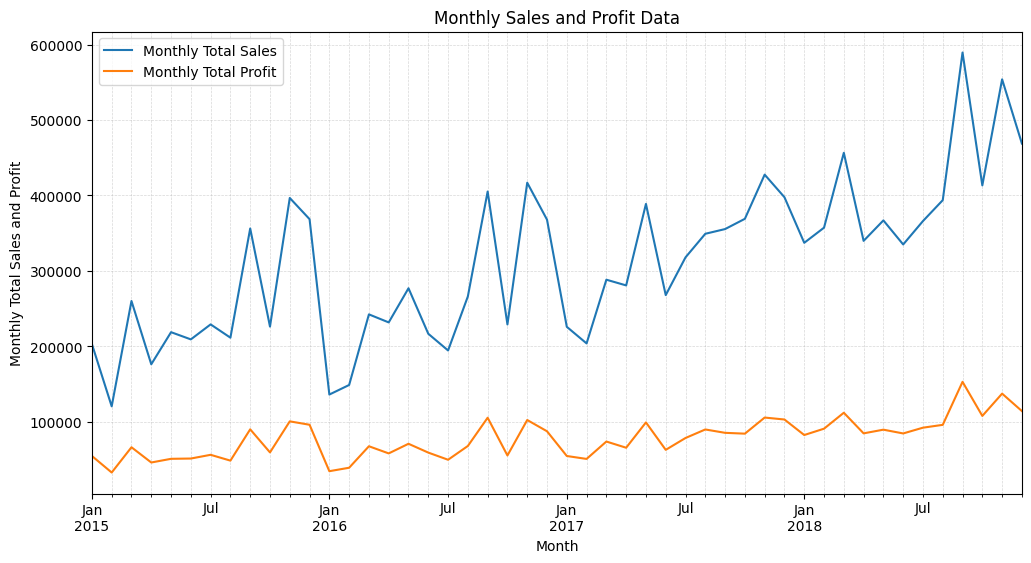

In [16]:
plt.figure(figsize=(12, 6))

df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().plot(label='Monthly Total Sales')

df.groupby(df['Order Date'].dt.to_period('M'))['Profit'].sum().plot(label='Monthly Total Profit')

plt.title('Monthly Sales and Profit Data')

plt.xlabel('Month')

plt.ylabel('Monthly Total Sales and Profit')

plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)  # Added light grid lines

plt.show()

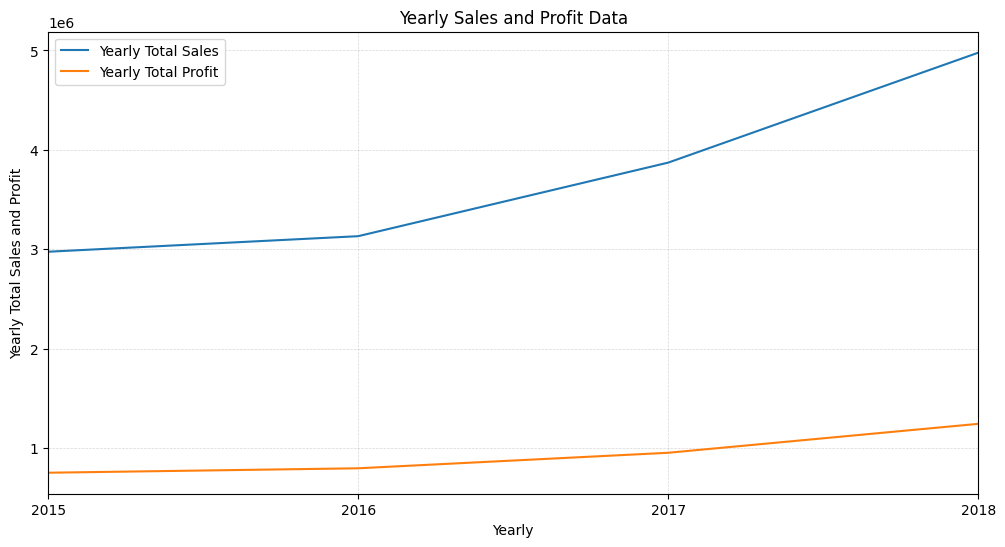

In [17]:
plt.figure(figsize=(12, 6))

df.groupby(df['Order Date'].dt.to_period('Y'))['Sales'].sum().plot(label='Yearly Total Sales')

df.groupby(df['Order Date'].dt.to_period('Y'))['Profit'].sum().plot(label='Yearly Total Profit')

plt.title('Yearly Sales and Profit Data')

plt.xlabel('Yearly')

plt.ylabel('Yearly Total Sales and Profit')

plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)  # Added light grid lines

plt.show()

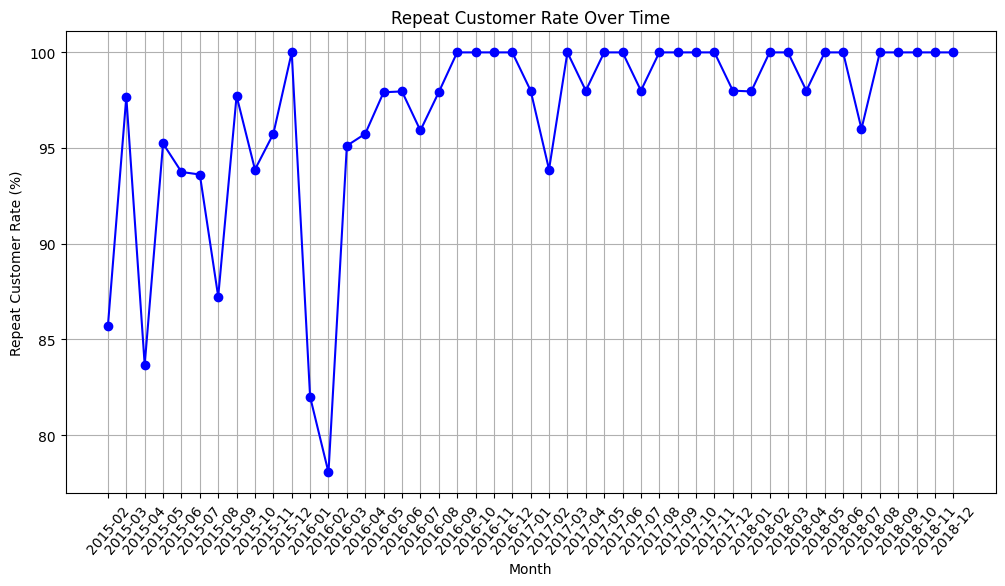

In [19]:
df['month'] = df['Order Date'].dt.to_period('M').sort_values()

customers_by_month = df.groupby('month')['Customer Name'].nunique()

start_customers = []

end_customers = []

new_customers = []

retention_rates = []

for i in range(1, len(customers_by_month)):

    start = customers_by_month.iloc[i-1]


    end = customers_by_month.iloc[i]


    current_month_customers = set(df[df['month'] == customers_by_month.index[i]]['Customer Name'])

    previous_month_customers = set(df[df['month'] == customers_by_month.index[i-1]]['Customer Name'])

    new_customers_in_month = len(current_month_customers - previous_month_customers)

    retention_rate = ((end - new_customers_in_month) / start) * 100



    start_customers.append(start)

    end_customers.append(end)

    new_customers.append(new_customers_in_month)

    retention_rates.append(retention_rate)

retention_df = pd.DataFrame({
    'month': customers_by_month.index[1:],
    'retention_rate': retention_rates
})

plt.figure(figsize=(12,6))

plt.plot(retention_df['month'].astype(str), retention_df['retention_rate'], marker='o', color='b')

plt.title('Repeat Customer Rate Over Time')

plt.xlabel('Month')

plt.ylabel('Repeat Customer Rate (%)')

plt.xticks(rotation=50)

plt.grid(True)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

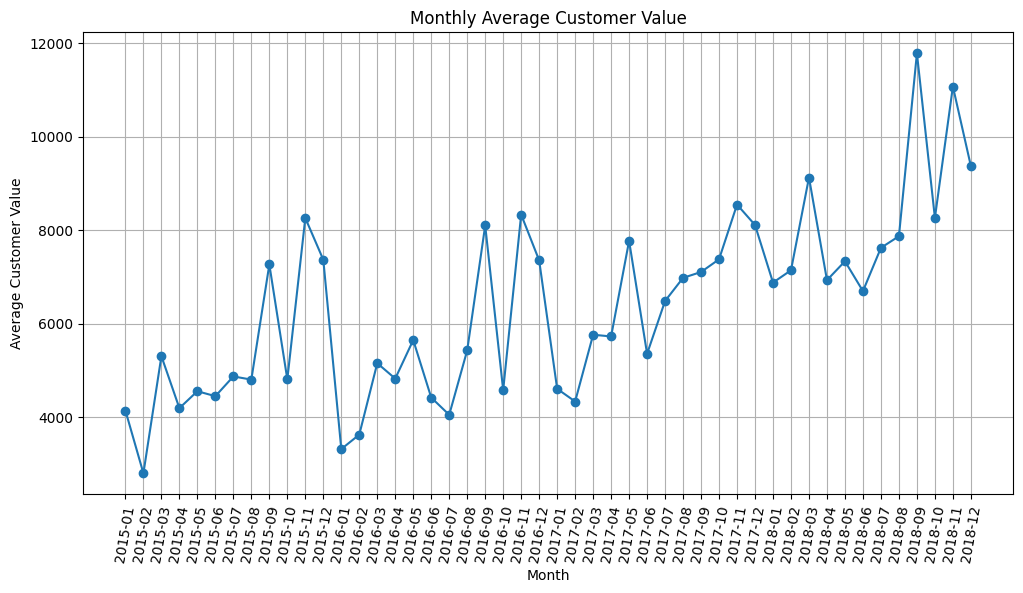

In [20]:
monthly_data = df.groupby('month').agg(

    total_revenue=('Sales', 'sum'),

    unique_customers=('Customer Name', pd.Series.nunique)

).reset_index()

monthly_data['average_customer_value'] = monthly_data['total_revenue'] / monthly_data['unique_customers']

plt.figure(figsize=(12,6))

plt.plot(monthly_data['month'].astype(str), monthly_data['average_customer_value'], marker='o')

plt.title('Monthly Average Customer Value')

plt.xlabel('Month')

plt.ylabel('Average Customer Value')

plt.xticks(rotation=80)

plt.grid(True)

plt.show


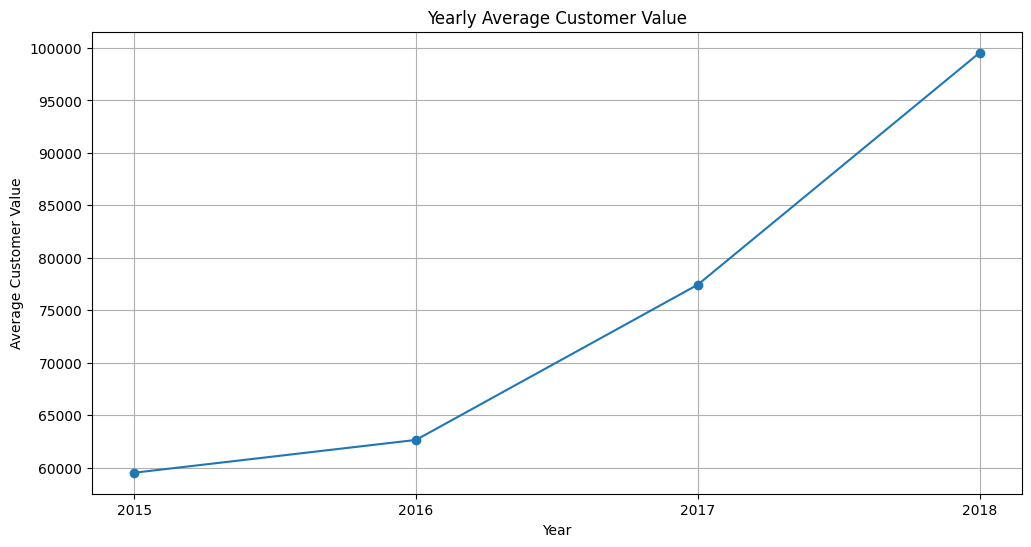

In [21]:
yearly_data = df.groupby('Order Year').agg(

    total_revenue=('Sales', 'sum'),

    unique_customers=('Customer Name', pd.Series.nunique)

).reset_index()

yearly_data['average_customer_value'] = yearly_data['total_revenue'] / yearly_data['unique_customers']

plt.figure(figsize=(12,6))

plt.plot(yearly_data['Order Year'].astype(str), yearly_data['average_customer_value'], marker='o')

plt.title('Yearly Average Customer Value')

plt.xlabel('Year')

plt.ylabel('Average Customer Value')

plt.grid(True)

plt.show()

